In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor,transforms
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import DataLoader
import torch
import random
from torch import nn

In [6]:
# model without softmax because nn.CrossEntropyLoss() have included
class ImageClassificationModel2 (nn.Module):
    def __init__(self,input_shape,output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(start_dim = 1, end_dim = -1),  # x_first_batch.shape = torch.Size([32, 3, 32, 32]) should pick(3,32,32). Thus, change start_dim to 1
            nn.Linear(in_features = input_shape, out_features = output_shape)
            # ,nn.Softmax(dim = 1) # model(x_first_batch).shape = torch.Size([32, 10]), should pick 10. Thus, change to dim = 1
        )

    def forward(self, x):
        return self.layer_stack(x)

In [7]:
torch.manual_seed(87)
model2 = ImageClassificationModel2(784,10)

In [8]:
#load train result
state_dict = torch.load("image_classification_weights.pth", weights_only=True)
model2.load_state_dict(state_dict)

<All keys matched successfully>

In [9]:
model2.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0353,  0.0279, -0.0032,  ..., -0.0251,  0.0327, -0.0172],
                      [-0.0107, -0.0177,  0.0131,  ...,  0.0322, -0.0352,  0.0179],
                      [-0.0196,  0.0092,  0.0163,  ..., -0.0203,  0.0294, -0.0308],
                      ...,
                      [ 0.0022,  0.0249, -0.0205,  ...,  0.0311,  0.0052, -0.0214],
                      [ 0.0281,  0.0322,  0.0321,  ...,  0.0145, -0.0040,  0.0085],
                      [ 0.0242,  0.0077, -0.0030,  ...,  0.0064,  0.0204,  0.0201]])),
             ('layer_stack.1.bias',
              tensor([-0.0864,  0.2267, -0.0180, -0.1125,  0.0773,  0.2201, -0.0384,  0.1551,
                      -0.3890, -0.0361]))])

In [10]:
from PIL import Image

In [21]:
# Define the same transform used during training
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # For grayscale MNIST-like data
    transforms.ToTensor()
])

# Load and preprocess the image
img_path = "archive/MNIST_dataset/test/5/11.png" #this is image '6'
image = Image.open(img_path)
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

#img = transform(image)  shape: [1, 28, 28]  (C, H, W)
#input_tensor = img.unsqueeze(0) shape: [1, 1, 28, 28] (B, C, H, W)


#Expected input of size [batch, channels, height, width]
#without batch, it will prompt error, Add a fake “batch” dimension to make it valid. [batch, channels, height, width]

In [22]:
outputs = model2(input_tensor)
torch.max(outputs, 1)

torch.return_types.max(
values=tensor([5.9399], grad_fn=<MaxBackward0>),
indices=tensor([5]))

In [23]:
with torch.no_grad():
    outputs = model2(input_tensor)
    _, predicted = torch.max(outputs, 1)
    pred_class = predicted.item()

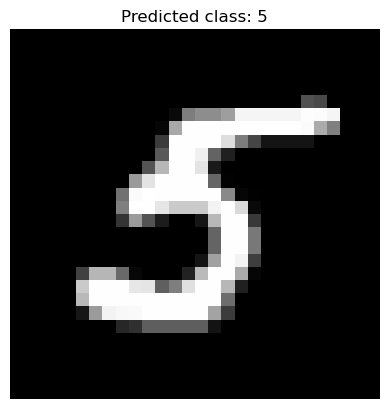

In [24]:
plt.imshow(image, cmap="gray")
plt.title(f"Predicted class: {pred_class}")
plt.axis("off")
plt.show()